[[-0.92715456 -0.3746791 ]
 [ 0.3746791  -0.92715456]]
Angle 22.004480640693515


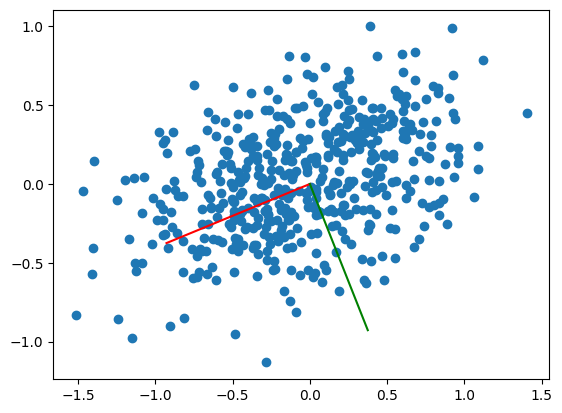

In [74]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

def get_cov(sdx=1., sdy=1., rotangdeg=0.):
    covar = np.array([[sdx, 0], [0, sdy]])
    rot_ang = rotangdeg / 360 * 2 * np.pi
    rot_mat = np.array([[np.cos(rot_ang), -np.sin(rot_ang)], [np.sin(rot_ang), np.cos(rot_ang)]])

    covar = np.matmul(np.matmul(rot_mat, covar), rot_mat.transpose())
    return covar

covar = get_cov(sdx=0.3,sdy=0.1,rotangdeg=23)

X = np.random.multivariate_normal([0,0],covar,500)
plt.scatter(X[:,0],X[:,1])

pca = PCA(n_components=2)
pca.fit(X)

data = pca.components_

print(data)
plt.plot([0,data[0,0]],[0,data[0,1]],c='red')
plt.plot([0,data[1,0]],[0,data[1,1]],c='green')
#print(pca.components_)

# find the angle between the two axes
angle_red = np.rad2deg(np.arctan2(data[0,1],data[0,0]))
# making sure the angle is always between 180 
angle_red = np.mod(angle_red,180)
print('Angle',angle_red)